# KPI             
**2025-09-16**

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

### Data load - Pendiente confirmar archivo fuente

In [2]:
input_path = r"data\staySpain_cleaned.pkl"
kpi_df = pd.read_pickle(input_path)

---

## KPI Semanal 1

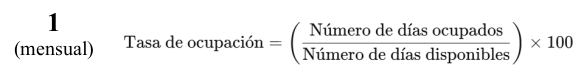

In [3]:
dias_mes = 30
num_dias_disponible = kpi_df.availability_30.mean()
num_dias_ocupado = dias_mes - num_dias_disponible
tasa_ocupacion = (num_dias_ocupado / dias_mes) * 100

### Tasa de ocupación global

In [13]:
resumen_kpi1 = f"Tasa de ocupación mensual global: {round(tasa_ocupacion,2)}%"
print(resumen_kpi1)

Tasa de ocupación mensual global: 59.28%


---

## KPI Semanal 2

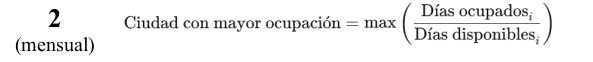

In [5]:
dias_mes = 30
ocupacion_por_ciudad = kpi_df.groupby(by='city')['availability_30'].mean().to_frame()
ocupacion_por_ciudad['dias_ocupados'] = dias_mes - ocupacion_por_ciudad.availability_30
ocupacion_por_ciudad['tasa_ocupacion'] = (ocupacion_por_ciudad.dias_ocupados / dias_mes) * 100
ocupacion_por_ciudad.sort_values(by="tasa_ocupacion", ascending=False, inplace=True)

### Ciudad con mayor ocupación

In [14]:
ciudad_max_ocupacion = ocupacion_por_ciudad.tasa_ocupacion.idxmax()
resumen_kpi2 = f"Ciudad con mayor ocupación en el último mes: {ciudad_max_ocupacion.upper()}"
print(resumen_kpi2)

Ciudad con mayor ocupación en el último mes: MADRID


In [7]:
display(ocupacion_por_ciudad.tasa_ocupacion.to_frame())

,tasa_ocupacion
city,
madrid,65.367717
barcelona,63.040993
malaga,59.577188
mallorca,55.802920
valencia,54.960718
sevilla,53.929619
girona,51.738863
menorca,50.628019


---

## KPI Semanal 3

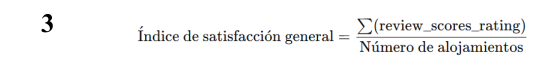

### Índice de satisfacción general

In [8]:
resumen_kpi3 = f"Indice de satisfacción general: {round(kpi_df.review_scores_rating.mean(),2)}"
print(resumen_kpi3)
# queda tener en cuenta que no haya apartment_id duplicados

Indice de satisfacción general: 92.01


---

## KPI Semanal 4

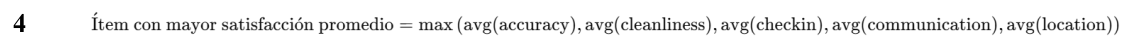

In [9]:
avg_scores = {
    'accuracy':      kpi_df.review_scores_accuracy.mean(),
    'cleanliness':   kpi_df.review_scores_cleanliness.mean(),
    'checkin':       kpi_df.review_scores_checkin.mean(),
    'communication': kpi_df.review_scores_communication.mean(),
    'location' :     kpi_df.review_scores_location.mean()
    }

# Sorting the dictionary by value in descending order
sorted_avg_scores = sorted(avg_scores.items(), key=lambda item: item[1], reverse=True)

### Ítem con mayor satisfacción promedio

In [10]:
resumen_kpi4 = f"Ítem con mayor satisfacción promedio: {sorted_avg_scores[0][0].upper()}"
print(resumen_kpi4)

Ítem con mayor satisfacción promedio: COMMUNICATION


In [11]:
# Printing the sorted key-value pairs
print("Satisfacción media para cada item:")
print("----------------------------------")
print()
for key, value in sorted_avg_scores:
    print(f"{round(value,2)}%\t{key}")

Satisfacción media para cada item:
----------------------------------

9.64%	communication
9.63%	checkin
9.53%	location
9.45%	accuracy
9.32%	cleanliness


---


## RESUMEN

In [12]:
print("KPI 1\t", resumen_kpi1)
print("KPI 2\t", resumen_kpi2)
print("KPI 3\t", resumen_kpi3)
print("KPI 4\t", resumen_kpi4)

KPI 1	 Tasa de ocupación global: 59.28%
KPI 2	 Ciudad con mayor ocupación: MADRID
KPI 3	 Indice de satisfacción general: 92.01
KPI 4	 Ítem con mayor satisfacción promedio: COMMUNICATION
